# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import data

In [2]:
df = pd.read_csv('../data/base_modelis_pass_det.csv',sep = ';')

# Dataviz rapide

In [3]:
df.isna().sum()

cd_op                      0
date_entree_defaut         0
date_sortie_defaut    315468
arrete                     0
fl_pass_DET                0
                       ...  
PTG                    29088
AGE_EMP1                   0
AGE_EMP2              134311
TX_ENDET               19935
MT_REST_VIVRE          25373
Length: 90, dtype: int64

In [4]:
df.head(5)

,cd_op,date_entree_defaut,date_sortie_defaut,arrete,fl_pass_DET,nb_prt,DT_MEP_OPE,CD_NAT_EMP1,CD_NAT_EMP2,ANC_BANC_MAX_PFI,...,EAD_1an_avant_def,LTVnonactu_1an_avant_def,dls_ges_def,AMI,EXE,PTG,AGE_EMP1,AGE_EMP2,TX_ENDET,MT_REST_VIVRE
0,I860708600,16/01/17,NaN,31/01/17,0,1,15SEP1986:00:00:00.000,NaN,NaN,NaN,...,1121.38,NaN,0,NaN,NaN,NaN,74,78.0,NaN,NaN
1,I860708600,16/01/17,NaN,28/02/17,0,1,15SEP1986:00:00:00.000,NaN,NaN,NaN,...,1121.38,NaN,1,NaN,NaN,NaN,75,78.0,NaN,NaN
2,I860708600,16/01/17,NaN,31/03/17,0,1,15SEP1986:00:00:00.000,NaN,NaN,NaN,...,1121.38,NaN,2,NaN,NaN,NaN,75,78.0,NaN,NaN
3,I860708600,16/01/17,NaN,30/04/17,0,1,15SEP1986:00:00:00.000,NaN,NaN,NaN,...,1121.38,NaN,3,NaN,NaN,NaN,75,78.0,NaN,NaN
4,I860708600,16/01/17,NaN,31/05/17,0,1,15SEP1986:00:00:00.000,NaN,NaN,NaN,...,1121.38,NaN,4,NaN,NaN,NaN,75,78.0,NaN,NaN


# Data treatment

In [5]:
df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])

C:\Users\baheu\AppData\Local\Temp\ipykernel_15932\1105208983.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_entree_defaut'] = pd.to_datetime(df['date_entree_defaut'])


In [6]:
df['arrete'] = pd.to_datetime(df['arrete'])

C:\Users\baheu\AppData\Local\Temp\ipykernel_15932\2871220427.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrete'] = pd.to_datetime(df['arrete'])


In [7]:
df_validation = df[df['arrete']>"2020-12-30"]

In [8]:
data = df[df['arrete']<"2020-12-30"]

In [9]:
data_logit = data.drop_duplicates(subset = 'cd_op', keep = 'last')

# 01-Logit simple

In [24]:
# Sélectionner les données
X = data_logit.select_dtypes(include='number').drop(columns=['ANC_BANC_MAX_PFI',
                                                             'MT_CHA_CSM_REV',
                                                             'MT_CHA_IMP',
                                                             'MT_CHA_PIP',
                                                             'MT_CHA_PIV',
                                                             'NB_RP_HOP',
                                                             'NB_RS_HOP',
                                                             'NB_LO_HOP',
                                                             'dtSRT1st',
                                                             'valeur_bien_afr',
                                                             'mt_inscrip_devant_CL_afr',
                                                             'dispo_HP_afr',
                                                             'MT_CHG_MSL',
                                                             'mt_rev_dispo',
                                                             'LTV_actu',
                                                             'LTVnonactu_1an_avant_def',
                                                             'AMI',
                                                             'EXE',
                                                             'PTG',
                                                             'AGE_EMP2',
                                                             'CD_MTF_ENE_CTX',
                                                             'niv_gravite_mtf_dne',
                                                             'niv_gravite_mtf_dfs',
                                                             'MT_CHG_MSL',
                                                             'mt_rev_dispo',
                                                             'TX_ENDET',
                                                             'MT_REST_VIVRE']) # On drop les var qui ont trop de NaN
X.dropna(inplace = True)

y = X['fl_pass_DET']

X.drop(columns = 'fl_pass_DET', inplace = True)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Afficher les résultats
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9958262189337886
Confusion Matrix:
 [[3757    5]
 [  17 1492]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3762
           1       1.00      0.99      0.99      1509

    accuracy                           1.00      5271
   macro avg       1.00      0.99      0.99      5271
weighted avg       1.00      1.00      1.00      5271


C:\Users\baheu\Documents\M2 MoSEF\Challenge_Credit_Logement\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


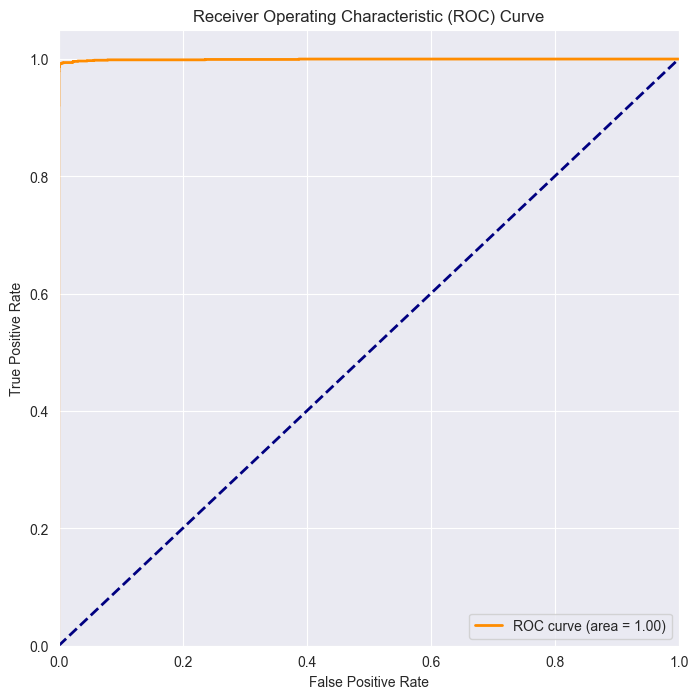

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Obtenir les probabilités prédites
y_probs = model.predict_proba(X_test)[:, 1]

# Calculer l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_probs)

# Calculer les taux de faux positifs et les taux de vrais positifs
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Tracer la courbe ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [26]:
X_temporaire = X.copy()

In [27]:
X_temporaire['y'] = y.copy()

In [36]:
corr = X_temporaire.corr(method = 'spearman')


# Tracer la matrice de corrélation avec Plotly Express
fig = px.imshow(corr,
                labels=dict(x="Variables", y="Variables", color="Coefficient de corrélation"),
                x=corr.columns,
                y=corr.columns,
                color_continuous_scale="Viridis",
                title="Matrice de corrélation (Spearman)")

fig.update_layout(width=900, height=900)
# Afficher le graphique
fig.show()

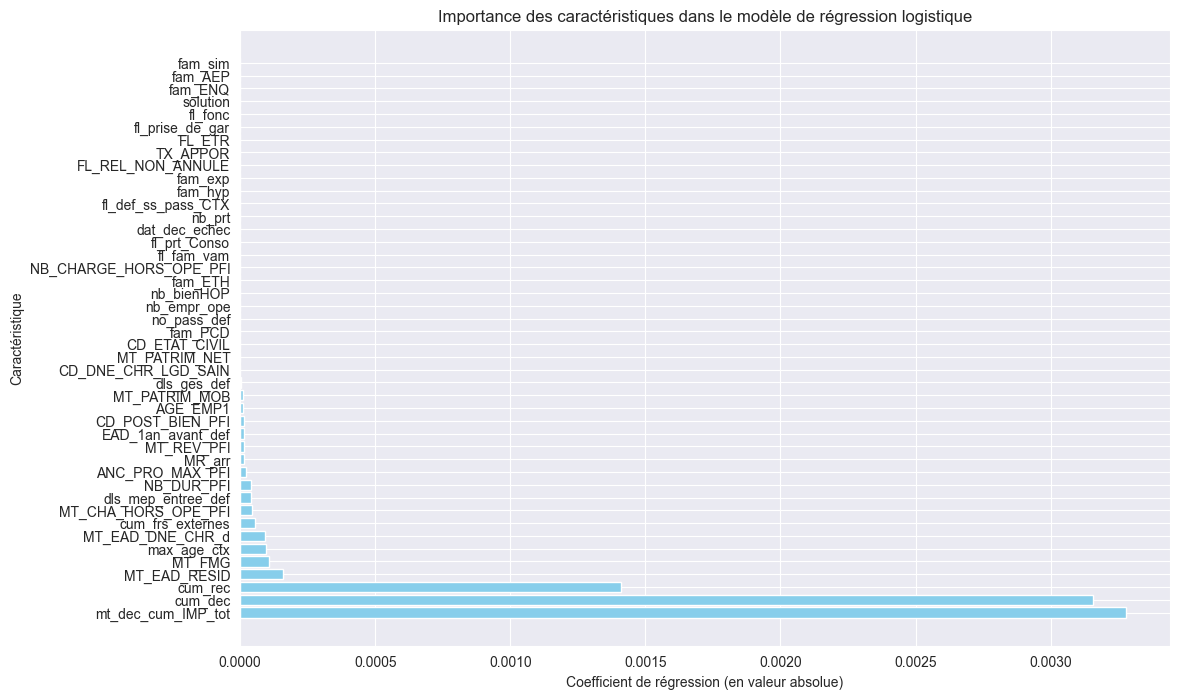

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Obtenir les coefficients du modèle
coefficients = model.coef_[0]

# Obtenir les noms des caractéristiques
feature_names = X.columns

# Créer un DataFrame avec les noms des caractéristiques et leurs coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Trier le DataFrame par coefficient en valeur absolue pour avoir une visualisation plus claire
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Tracer le graphique des importances des caractéristiques
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Coefficient de régression (en valeur absolue)')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques dans le modèle de régression logistique')
plt.show()
